In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import statsmodels.api as sm
#from statsmodels.sandbox.regression.predstd import wls_prediction_std

In [3]:
nome_arq = 'Regress_ex2.xls'
df = pd.read_excel(nome_arq)
df.head(3)

,ID,x1,x2,x3
0,1,9.95,2,50
1,2,24.45,8,110
2,3,31.75,11,120


In [4]:
x_col = ['x2', 'x3']
y_col = 'x1'
X = df[x_col]
y = df[y_col]

In [5]:
df_quant = df.iloc[:,1:4]
df_quant.columns

Index(['x1', 'x2', 'x3'], dtype='object')

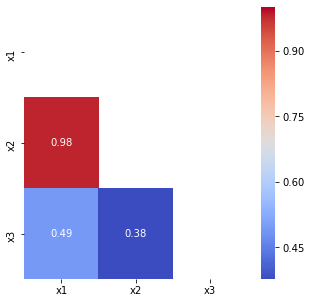

In [6]:
# matriz de correlação df_quant
fig, ax = plt.subplots(figsize=(5, 5)) 
mask = np.zeros_like(df_quant.corr().abs())
mask[np.triu_indices_from(mask)] = 1
sns.heatmap(df_quant.corr().abs(), mask= mask, ax= ax, cmap='coolwarm', annot= True)

In [7]:
X = sm.add_constant(X)
model = sm.OLS(y, X)
modelfit = model.fit()
pred = modelfit.predict(X)
print(modelfit.summary())

                            OLS Regression Results                            
Dep. Variable:                     x1   R-squared:                       0.981
Model:                            OLS   Adj. R-squared:                  0.979
Method:                 Least Squares   F-statistic:                     572.2
Date:                Thu, 23 Apr 2020   Prob (F-statistic):           1.08e-19
Time:                        21:18:00   Log-Likelihood:                -54.568
No. Observations:                  25   AIC:                             115.1
Df Residuals:                      22   BIC:                             118.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.2638      1.060      2.136      0.0

c:\users\marce\appdata\local\programs\python\python37\lib\site-packages\numpy\core\fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [8]:
modelfit.params

const    2.263791
x2       2.744270
x3       0.012528
dtype: float64

In [9]:
modelfit.rsquared

0.9811374834912948